In [1]:
########## MACHINE LEARNING ASSIGNMENT -3 ############
### DECISION TREE, RANDOM FOREST, SUPPORT VECTOR CLASSIFICATION
## IMPLEMENTATION USING SCI-KIT LEARN
# Note : NOT FROM SCRATCH


In [2]:
# IMPORT LIBRARIES
import numpy as np
import seaborn as sn
from sklearn import *
from sklearn.ensemble import *
from sklearn.datasets import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.neural_network import *
import matplotlib.pyplot as plt
import pandas as pd
import graphviz

In [3]:
n = []
for i in range(0,60):
    n.append(i)
print(n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [4]:
n.append("o")
print(n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 'o']


In [5]:
df = pd.read_csv("sonar.all-data" , names =n)

In [6]:
df.head()
df["o"].value_counts()
repl = {"o": {"M": 1, "R": 0 }}
df_new = df.replace(repl)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,o
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [7]:
df1 = df_new.drop(df.columns[len(df.columns)-1], axis=1)

In [8]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [9]:
X = df1
print(X)
Y = df_new["o"].tolist()
print(Y)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=63)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102 

[Text(186.0, 205.35999999999999, 'X[10] <= 0.171\nentropy = 0.5\nsamples = 166\nvalue = [84, 82]'),
 Text(93.0, 181.2, 'X[3] <= 0.052\nentropy = 0.296\nsamples = 61\nvalue = [50, 11]'),
 Text(37.2, 157.04, 'X[18] <= 0.881\nentropy = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(18.6, 132.88, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(55.800000000000004, 132.88, 'X[23] <= 0.918\nentropy = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(37.2, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(74.4, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 157.04, 'X[44] <= 0.162\nentropy = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(130.20000000000002, 132.88, 'X[29] <= 0.488\nentropy = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(111.60000000000001, 108.72, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(148.8, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 132.88, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(279.0, 181.2, 'X[4

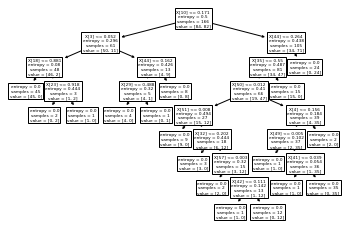

In [10]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf)


In [11]:
# Decision Tree Visualization Graph
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("tree")
print(clf.feature_importances_)
predicted = clf.predict(X_test)
print(accuracy_score(y_test,predicted))

[0.         0.         0.         0.10436445 0.04091803 0.
 0.         0.         0.         0.         0.22863816 0.
 0.         0.         0.         0.         0.         0.
 0.03012485 0.         0.         0.         0.         0.01606659
 0.         0.         0.         0.         0.         0.01927991
 0.         0.         0.03855981 0.         0.         0.1493733
 0.         0.         0.         0.         0.         0.02343044
 0.02224605 0.         0.12607401 0.         0.         0.
 0.         0.02216393 0.07890044 0.06426636 0.         0.
 0.         0.         0.         0.03559367 0.         0.        ]
0.7619047619047619


In [12]:
# Random Forest classifier
clf1 = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
print(clf1.feature_importances_)
predicted = clf


1.predict(X_test)
print(accuracy_score(y_test,predicted))

SyntaxError: invalid syntax (<ipython-input-13-62ea0edaf43e>, line 5)

In [14]:
# Support Vector Machine Classification
clf2 = svm.SVC(gamma='scale')
clf2.fit(X_train,y_train)
predicted = clf2.predict(X_test)
print(accuracy_score(y_test,predicted))

0.8571428571428571


In [15]:
clf_e= tree.DecisionTreeClassifier(criterion="entropy",random_state=60,max_depth=3,min_samples_leaf=5)
clf_e = clf_e.fit(X_train,y_train)
Ypred = clf_e.predict(X_test)
print(accuracy_score(y_test,Ypred))

0.8809523809523809


In [16]:
##### K --- FOLD CROSS VALIDATION  #####
kf = KFold(n_splits=10)
kf.get_n_splits(X)
accuracy = []

clf = tree.DecisionTreeClassifier(criterion='gini', random_state = 42)
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 63)
scores = cross_val_score(clf, X, Y, cv=kf)
avg_score = np.mean(scores)
print(avg_score)
scores_en = cross_val_score(clf_entropy, X, Y, cv=kf)
avg_score_en = np.mean(scores_en)
print(avg_score_en) 

0.5695238095238094
0.6835714285714285


In [17]:
# Neural Network --- Multi Layer Perceptron
nn_mlp = MLPClassifier(hidden_layer_sizes=(24,), activation='logistic', solver='adam', alpha=0.0001,
                    batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=200, shuffle=True, random_state=40, tol=0.0001, 
                    verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=10)
nn_mlp.fit(X_train,y_train)
predictions = nn_mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



[[11  2]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.92      0.76      0.83        29

    accuracy                           0.79        42
   macro avg       0.76      0.80      0.77        42
weighted avg       0.82      0.79      0.79        42



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[11  2]
 [ 7 22]]


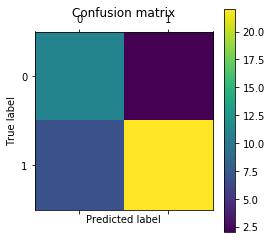

In [18]:
cm = confusion_matrix(y_test, predictions)

print(cm)

# Confusion matrix on test samples
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Plotting heat map of confusion matrix -- dependency of different variables
# Note to view completely please click on the image
# if want to know the test dataset kindly convert it into a array and put the index out there in 
# pd.DataFrame command.
# Execution takes time so if you want to view just reduce the range.
# Mentioned at last to avoid the time delay in running the entire code.
df_cm = pd.DataFrame(df_new, range(209), range(62))
plt.figure(figsize = (100,50))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
####################################... NOTES ... #########################################
''' 

'''